# Sentiment Analysis on the reviews against Jio network

In this project, we have aimed to analysis the reviews on the Jio network operator and classify them accordingly into satisfaction level as "Satisfied", "Unsatisfied" and "Neutral"

### Link for the Project

https://drive.google.com/drive/folders/1WJvYR2JOuJ4FD4KAc4e3DJjPYZUanOV5?usp=sharing

## Importing all required modules

In [1]:
# pip install seaborn
# pip install numpy
# pip install pandas
# pip install mlxtend.preprocessin
# pip install scipy.stats
# pip install geopy.geocoders
# pip install mpl_toolkits.basemap
# pip install os
# pip install category_encoders

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from scipy.stats import norm
import statistics

In [3]:
df = pd.read_csv("Assgn1-Data-111903129_111903130_111903131_old.csv")

## Scrapped Data Attributes

In [4]:
df

,user_id,location,reviews,comment title,date & time,views,more comment
0,saivineshb4u,India,2,Worst Customer Support Of Jio Fibre,6 days ago,226,Please don't take connection of Jio Fibre. The...
1,tsghuman701,India,NaN,Internet searvice too slow even 2G searvice fast,6 days ago,170,Internet service is running slow like 2G netwo...
2,francisf56,India,5,Jio Fraud Recharge Gimmick,18 days ago,598,I have a Jio one year mobile plan. I renewed ...
3,NaN,NaN,18,NaN,NaN,NaN,NaN
4,Rajkiran061992,Chandigarh India,6,"No customer support, Data Scam, Porting issues",20 days ago,642,I ported from Airtel thinking Jio is much syst...
...,...,...,...,...,...,...,...
13211,sulemanbhai0786,Nangloi India,NaN,Super reliance jio 4G,"May 03, 2017 08:59 PM",1409,Reliance jio now a days every person know abou...
13212,raghummwm,Kanpur India,NaN,Best Big 4g network?,"May 03, 2017 05:06 PM",1377,This is the first india 4 g network .this netw...
13213,Shyamjee_gupta,Delhi India,NaN,Best network i ever used,"May 03, 2017 04:46 PM",1884,Jio is one of the best network I ever used.Int...
13214,sujansarangi,#NAME?,NaN,Reliance jio service,"May 03, 2017 02:11 PM",1344,Reliance jio is now one of the greatest mobile...


In [5]:
print(df.dtypes)

user_id          object
location         object
reviews          object
comment title    object
date & time      object
views            object
more comment     object
dtype: object


## Null Values

In [6]:
df.isnull().sum()

user_id           644
location          870
reviews          1834
comment title     644
date & time       644
views               1
more comment      646
dtype: int64

# Data Cleaning

## Instance of Geopy

In [7]:
from geopy.geocoders import Nominatim
loc = Nominatim(user_agent="GetLoc")
getLoc = loc.geocode("Mumbai,India")
print(getLoc.latitude,getLoc.longitude)

19.0785451 72.878176


# Updated Dataset

In [8]:
df = pd.read_csv("Assign1-Data-111903129_111903130_111903131.csv")

In [9]:
df

,user_id,location,Latitude,Longitude,reviews,comment title,Days ago(19 feb 2022),Year,views,more comment
0,saivineshb4u,India,18.597232,73.760236,2.0,Worst Customer Support Of Jio Fibre,6,2022,226.0,Please don't take connection of Jio Fibre. The...
1,tsghuman701,India,22.351115,78.667743,NaN,Internet searvice too slow even 2G searvice fast,6,2022,170.0,Internet service is running slow like 2G netwo...
2,francisf56,India,22.351115,78.667743,5.0,Jio Fraud Recharge Gimmick,18,2022,598.0,I have a Jio one year mobile plan. I renewed ...
3,Rajkiran061992,"Chandigarh,India",30.733442,76.779714,6.0,"No customer support, Data Scam, Porting issues",20,2022,642.0,I ported from Airtel thinking Jio is much syst...
4,beastviper8709,India,22.351115,78.667743,14.0,Bad conection,21,2022,695.0,Very very poor connection of jio network alway...
...,...,...,...,...,...,...,...,...,...,...
11854,prafulusb,India,22.351115,78.667743,10.0,Great,2192,2016,25489.0,The 4g of reliace is too fast I love that spee...
11855,krishnakantmishra,"Jhanjharpur,India",26.287153,86.340393,3.0,With customer reliance has no alliance!,2192,2016,9350.0,My name is Krishna kant and here are a few wor...
11856,sonu777p514,"New,Delhi,India",28.613895,77.209006,3.0,Forest network even in Delhi Metro city,2192,2016,34920.0,Reliance GSM is known for giving cheaper servi...
11857,bkp_iter,"Bhubaneswar,India",20.281058,85.811403,4.0,"Reliance Jio, A Revolution in Mobile Communica...",2196,2016,4292.0,Famous Reliance company has launched Reliance ...


In [10]:
print(df.dtypes)

user_id                   object
location                  object
Latitude                 float64
Longitude                float64
reviews                  float64
comment title             object
Days ago(19 feb 2022)      int64
Year                       int64
views                    float64
more comment              object
dtype: object


In [11]:
df.isnull()

,user_id,location,Latitude,Longitude,reviews,comment title,Days ago(19 feb 2022),Year,views,more comment
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
11854,False,False,False,False,False,False,False,False,False,False
11855,False,False,False,False,False,False,False,False,False,False
11856,False,False,False,False,False,False,False,False,False,False
11857,False,False,False,False,False,False,False,False,False,False


# Heatmap of the Co-relation

<AxesSubplot:>

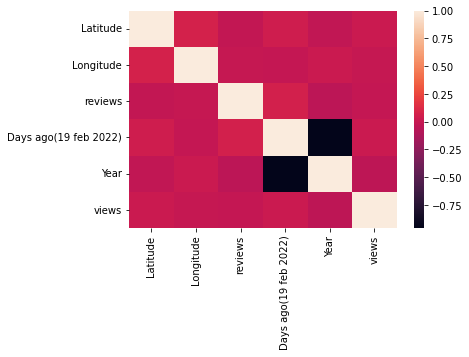

In [12]:
sns.heatmap(df.corr())

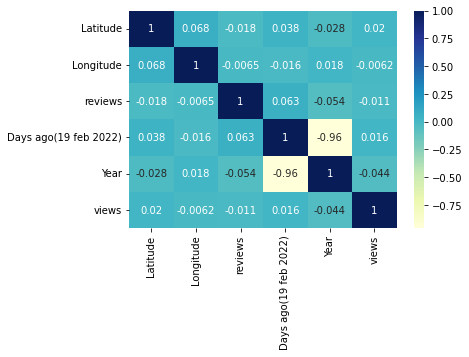

In [13]:
dataplot = sns.heatmap(df.corr() , cmap="YlGnBu", annot=True)

In [14]:
# sns.pairplot(df,hue='Year')

## Geo-spatial Mapping of the reviewer's location

In [15]:
import os

from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import numpy as np
from numpy import array

Text(0.5, 1.0, 'JIO NETWORK REVIEWS SCATTERPLOT')

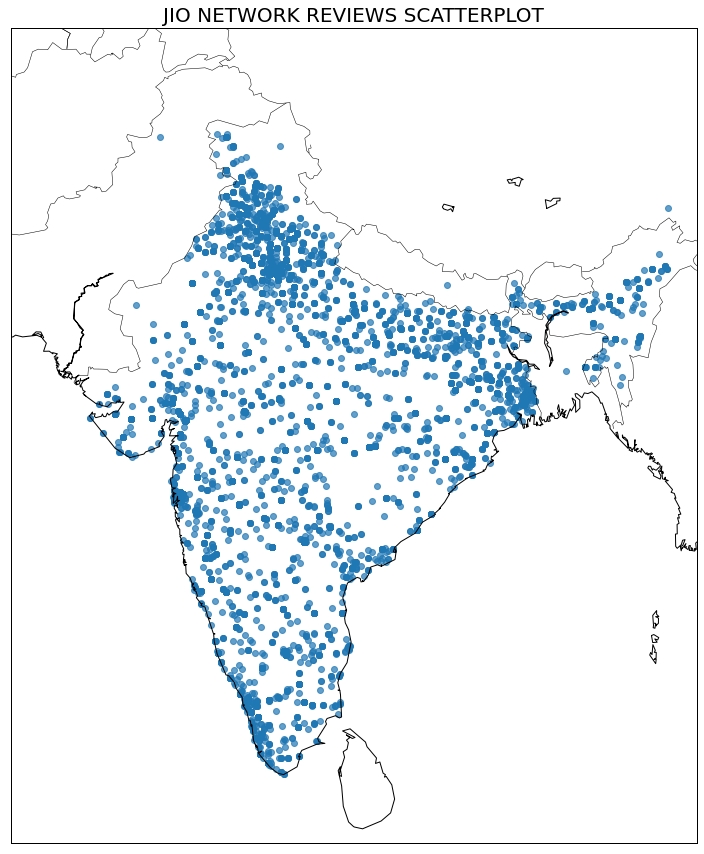

In [16]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

lg=array(df['Longitude'])
lt=array(df['Latitude'])


x, y = map(lg, lt)
plt.scatter(x, y, marker="o", cmap=cm.Dark2, alpha=0.7)
plt.title('JIO NETWORK REVIEWS SCATTERPLOT',fontsize=20)

# Outliers Removed Data Set

In [17]:
mydata = pd.read_csv("Outlier_removed_year.csv")

Text(0.5, 1.0, 'JIO NETWORK REVIEWS SCATTERPLOT')

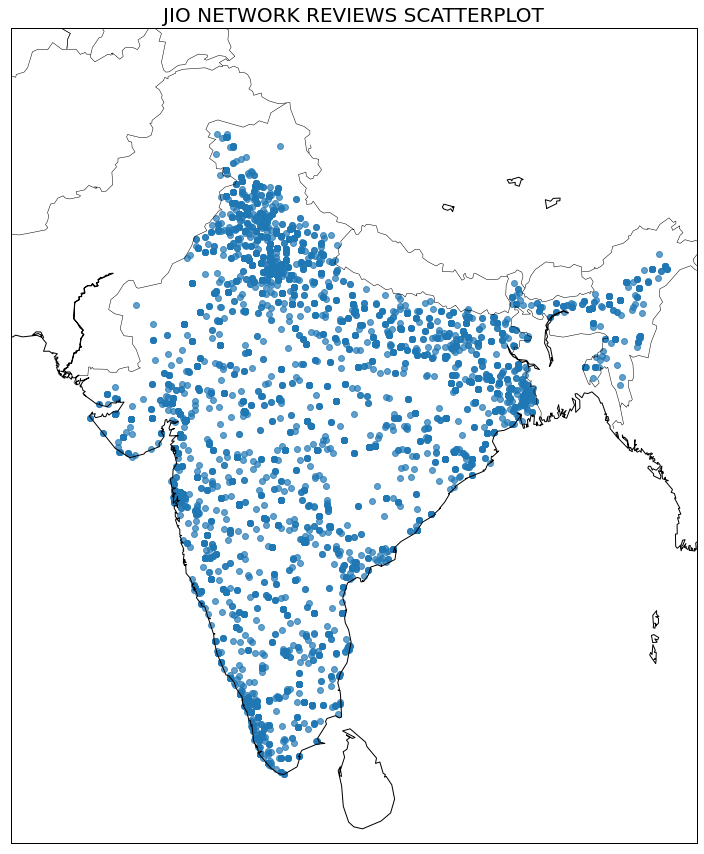

In [18]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

lg=array(mydata['Longitude'])
lt=array(mydata['Latitude'])


x, y = map(lg, lt)
plt.scatter(x, y, marker="o", cmap=cm.Dark2, alpha=0.7)
plt.title('JIO NETWORK REVIEWS SCATTERPLOT',fontsize=20)

In [19]:
import category_encoders as ce
data=mydata["State"]
encoder=ce.OneHotEncoder(cols='State',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
data.head()

0               NaN
1         Karnataka
2    Madhya Pradesh
3               NaN
4               NaN
Name: State, dtype: object

In [20]:
data_encoded = encoder.fit_transform(data)
data_encoded

,State_nan,State_Karnataka,State_Madhya Pradesh,State_Rajasthan,State_Jammu and Kashmir,State_West Bengal,State_Gujarat,State_Maharashtra,State_Punjab,State_Telangana,...,State_Chandigarh,State_Tripura,State_Goa,State_Puducherry,State_Sikkim,State_Manipur,State_Nagaland,State_Meghalaya,State_Dadra and Nagar Haveli and Daman and Diu,State_Ladakh
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11838,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11839,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


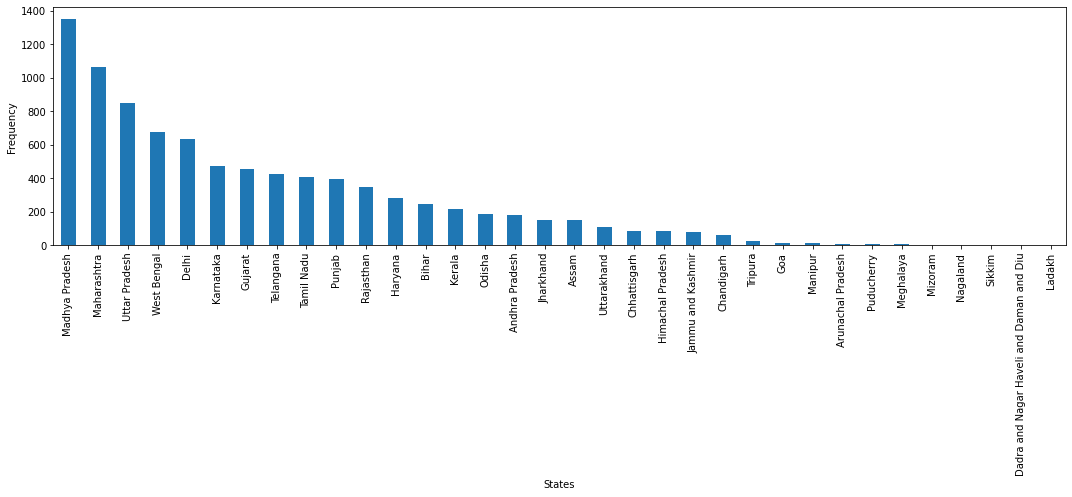

In [21]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
df = pd.DataFrame({'States': data})
df['States'].value_counts().plot(ax=ax, kind='bar', xlabel='States', ylabel='Frequency')
plt.show()

# Reviews from different Parts

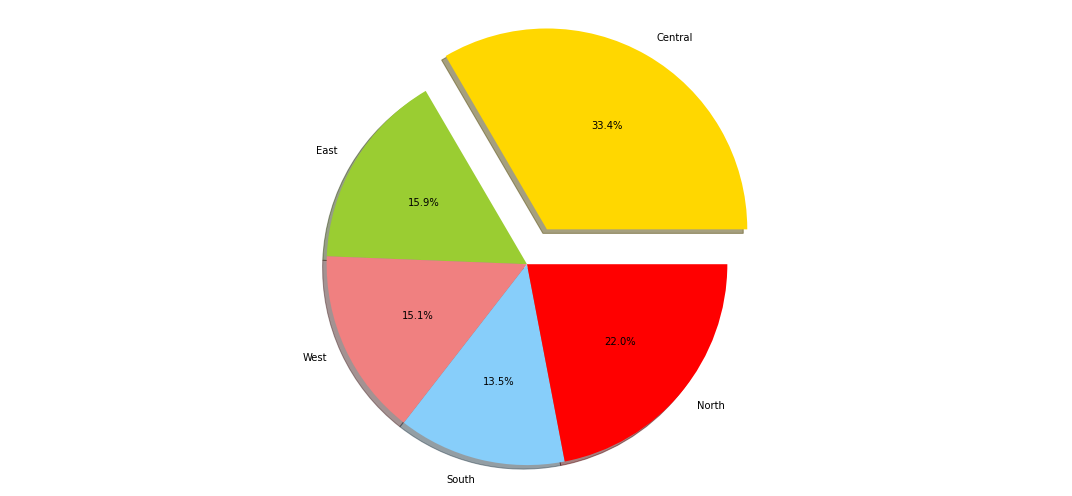

In [22]:
# Data to plot
labels = "Central","East","West","South","North"
#North = 2607
#south 1606
#central 3965
#west 1791
#east 1890
sizes = [3965,1890,1791,1606,2607]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.2, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True)

plt.axis('equal')
plt.show()

# PreProcessing on Comments

In [23]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


In [24]:
mydata = pd.read_csv('Outlier_removed_year.csv')

In [25]:
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text).lower()
    return text

# Cleaning the text in the review column
X = mydata['Comments'].apply(clean)
X.head()

0     jio is the trend of today we all know that ji...
1     reliance jio a g network of reliance which ha...
2     reliance jio is a g network service for india...
3     mukesh ambani starts by talking about younges...
4     the jio is a g service the jio is a g service...
Name: Comments, dtype: object

In [26]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger')

In [27]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [28]:
# X = X.apply(token_stop_pos)
# X.head()

X = X[0:1].apply(token_stop_pos)
X

0    [(jio, n), (trend, n), (today, n), (know, v), ...
Name: Comments, dtype: object

In [29]:
# X = X.apply(lemmatize)
# X.head()
print(X.apply(lemmatize))

0      jio trend today know jio offer free internet...
Name: Comments, dtype: object


## Saving the Lemmatized data to reduce Time

In [30]:
#mydata.to_csv('finalize.csv')

In [31]:
Lemmatize = pd.read_csv('https://drive.google.com/uc?export=download&id=1LLBtx9seVzpYIPH39-uJNKfiP_RLIRGJ')
Lemmatize.head()

,Comments,Cleaned Reviews,POS tagged,Lemma
0,"""jio"" is the trend of today we all know that j...",jio is the trend of today we all know that ji...,"[('jio', 'n'), ('trend', 'n'), ('today', 'n'),...",jio trend today know jio offer free internet...
1,"""Reliance Jio"" a 4G network of Reliance which ...",reliance jio a g network of reliance which ha...,"[('reliance', 'n'), ('jio', 'n'), ('g', 'n'), ...",reliance jio g network reliance give awesome...
2,"""Reliance Jio"" is a 4G network service for Ind...",reliance jio is a g network service for india...,"[('reliance', 'n'), ('jio', 'n'), ('g', 'a'), ...",reliance jio g network service indian useful...
3,# Mukesh Ambani starts by talking about younge...,mukesh ambani starts by talking about younges...,"[('mukesh', 'a'), ('ambani', 'n'), ('starts', ...",mukesh ambani start talk young member relian...
4,## The Jio is a 4G service.##The Jio is a 4G ...,the jio is a g service the jio is a g service...,"[('jio', 'n'), ('g', 'a'), ('service', 'n'), (...",jio g service jio g service well sure know w...


# Hashing(Word Level) the lemmatize Comments 

In [32]:
import pandas as pd 

In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [34]:
X = Lemmatize["Lemma"]

In [35]:
x = list(X)
x =x[:100]

In [36]:
def shingle(text: str):
    shingle_set = text.split()
    return set(shingle_set)


b = set()
for row in x:
    a = shingle(row)
    b = b.union(a)
    
limit= 10
b 

{'simthe',
 'reloance',
 'suddenly',
 'anyone',
 'p',
 'struggle',
 'thi',
 'mobil',
 'three',
 'pick',
 'facility',
 'late',
 'connection',
 'speed',
 'faltu',
 'userit',
 'complete',
 'demand',
 'indian',
 'another',
 'dhanaaaaa',
 'statistic',
 'range',
 'question',
 'sms',
 'decrease',
 'entrance',
 'cross',
 'unbelievable',
 'l',
 'dhana',
 'employes',
 'announce',
 'beam',
 'family',
 'reach',
 'several',
 'poornetwork',
 'device',
 'w',
 'rd',
 'narendra',
 'january',
 'unstable',
 'odd',
 'mbps',
 'everything',
 'congrats',
 'monthe',
 'benifits',
 'collectively',
 'unlimited',
 'else',
 'prime',
 'everywhere',
 'essentially',
 'satisfying',
 'november',
 'cop',
 'considerable',
 'ruppe',
 'quite',
 'approx',
 'supervisor',
 'yeh',
 'execution',
 'caller',
 'subscribe',
 'jionet',
 'text',
 'interest',
 'country',
 'cdma',
 'uu',
 'choose',
 'opportunity',
 'date',
 'peopeleven',
 'occures',
 'package',
 'least',
 'cart',
 'yes',
 'cheap',
 'regular',
 'stay',
 'bhyander',
 'ma

In [37]:
hot_list = []

for row in x:
    h1 = [1 if x in row else 0 for x in b]
    hot_list.append(h1)
signature = []

print(hot_list)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
from random import shuffle
def create_hash_func(size: int):
    # function for creating the hash vector/function
    hash_ex = list(range(1, len(b)+1))
    shuffle(hash_ex)
    return hash_ex

def build_minhash_func(vocab_size: int, nbits: int):
    # function for building multiple minhash vectors
    hashes = []
    for _ in range(nbits):
        hashes.append(create_hash_func(vocab_size))
    return hashes


def create_hash(vector: list):
    # use this function for creating our signatures (eg the matching)
    signature = []
    for func in minhash_func:
        for i in range(1, len(b)+1):
            idx = func.index(i)
            signature_val = vector[idx]
            if signature_val == 1:
                signature.append(i)
                break
    return signature

# we create 20 minhash vectors
minhash_func = build_minhash_func(len(b), 20)
print(len(minhash_func))

20


In [39]:
signature_matrix = []
for i in range(len(hot_list)):
    signature_matrix.append(create_hash(hot_list[i]))

print('--------------------------------------------------------------------------------')
def matrix_print(m):
    for i in range(len(m)):
        if(i <limit):
            print("\t\t\t",end="")
            print(m[i])
    
print("Signature Matrix :")
matrix_print(signature_matrix)

--------------------------------------------------------------------------------
Signature Matrix :
			[95, 19, 23, 22, 47, 49, 27, 3, 6, 11, 3, 52, 18, 1, 26, 92, 37, 29, 15, 12]
			[19, 9, 48, 20, 14, 6, 19, 1, 3, 1, 3, 2, 9, 28, 19, 20, 20, 3, 2, 12]
			[13, 40, 48, 25, 14, 48, 1, 1, 6, 1, 3, 7, 6, 4, 27, 20, 9, 14, 9, 3]
			[14, 12, 56, 30, 14, 16, 30, 3, 8, 46, 3, 21, 2, 4, 77, 21, 38, 14, 10, 7]
			[18, 9, 27, 25, 2, 8, 11, 1, 6, 1, 3, 7, 2, 5, 23, 20, 38, 14, 15, 3]
			[31, 40, 42, 7, 14, 29, 5, 1, 18, 1, 3, 8, 10, 40, 26, 13, 2, 14, 37, 24]
			[45, 15, 9, 5, 7, 4, 16, 3, 28, 1, 3, 10, 17, 1, 4, 20, 9, 6, 5, 4]
			[64, 40, 1, 87, 14, 108, 18, 16, 39, 25, 62, 137, 18, 40, 77, 54, 9, 22, 44, 24]
			[21, 40, 9, 70, 14, 4, 13, 1, 28, 1, 3, 4, 18, 28, 27, 20, 7, 6, 15, 24]
			[71, 40, 43, 44, 13, 22, 27, 3, 6, 58, 3, 52, 6, 4, 12, 20, 38, 20, 9, 23]


In [40]:
def jaccard(a: set, b: set):
    return len(a.intersection(b)) / len(a.union(b))



print("Jaccard Similarity : \n")
a = x[0]
for i in range(len(hot_list)):
    a = jaccard(set(signature_matrix[0]),set(signature_matrix[i]))
    if(i < limit):
        print(f"\t\tJaccard similarity of comment1 with comment {(i+1)} :", round(a,2))

Jaccard Similarity : 

		Jaccard similarity of comment1 with comment 1 : 1.0
		Jaccard similarity of comment1 with comment 2 : 0.2
		Jaccard similarity of comment1 with comment 3 : 0.14
		Jaccard similarity of comment1 with comment 4 : 0.06
		Jaccard similarity of comment1 with comment 5 : 0.29
		Jaccard similarity of comment1 with comment 6 : 0.2
		Jaccard similarity of comment1 with comment 7 : 0.14
		Jaccard similarity of comment1 with comment 8 : 0.09
		Jaccard similarity of comment1 with comment 9 : 0.2
		Jaccard similarity of comment1 with comment 10 : 0.24


In [41]:
def cosine(a,b):
    a = a.split(" ")
    bb = b.split(" ")
    dicc = {}
    c = set(a)
    d = set(b)
    c = c.union(d)
    for i in a :
        if i in dicc:
            a = dicc[i][0]
            b = dicc[i][1]
            dicc[i] = [a+1,b]
        else :
            dicc[i] = [1,0]
    for i in bb:
        if i in dicc:
            a = dicc[i][0]
            b = dicc[i][1]
            dicc[i] = [a,b+1]
        else :
            dicc[i] = [0,1]

    temp = dicc.keys()
    sum_c = 0
    sum_a = 0 
    sum_b = 0
    for i in temp:
        k = dicc[i]
        sum_c += (k[0]*k[1])
        sum_a += (k[0] * k[0])
        sum_b += ( k[1] * k[1])

    return ( sum_c / ( sum_a**(1/2) * sum_b**(1/2)) )
print("Cosine Similarity ")
for i in range(len(hot_list)):
    a = cosine(x[0],x[i])
    if(i < limit):
        print(f"\t\tcosine similarity of comment1 with comment {(i+1)} :", round(a,2))


Cosine Similarity 
		cosine similarity of comment1 with comment 1 : 1.0
		cosine similarity of comment1 with comment 2 : 0.31
		cosine similarity of comment1 with comment 3 : 0.24
		cosine similarity of comment1 with comment 4 : 0.25
		cosine similarity of comment1 with comment 5 : 0.5
		cosine similarity of comment1 with comment 6 : 0.24
		cosine similarity of comment1 with comment 7 : 0.26
		cosine similarity of comment1 with comment 8 : 0.16
		cosine similarity of comment1 with comment 9 : 0.43
		cosine similarity of comment1 with comment 10 : 0.51


In [42]:
band = 20
row = 5

lsh_matrix =[]

def split_vector(signature, b):
    assert len(signature) % b == 0
    r = int(len(signature) / b)
    # code splitting signature in b parts
    subvecs = []
    for i in range(0, len(signature), r):
        subvecs.append(signature[i : i+r])
    return subvecs

for i in range(len(hot_list)):
    a = split_vector(signature_matrix[i],band)
    lsh_matrix.append(a)
print("LSH Matrix :")
def th_matrix_print(m):
    for i in range(len(m)):
        if(  i <  limit):
            print("\t\t\t",end="")
            print(m[i])

LSH Matrix :


In [43]:
th_matrix_print(lsh_matrix)

			[[95], [19], [23], [22], [47], [49], [27], [3], [6], [11], [3], [52], [18], [1], [26], [92], [37], [29], [15], [12]]
			[[19], [9], [48], [20], [14], [6], [19], [1], [3], [1], [3], [2], [9], [28], [19], [20], [20], [3], [2], [12]]
			[[13], [40], [48], [25], [14], [48], [1], [1], [6], [1], [3], [7], [6], [4], [27], [20], [9], [14], [9], [3]]
			[[14], [12], [56], [30], [14], [16], [30], [3], [8], [46], [3], [21], [2], [4], [77], [21], [38], [14], [10], [7]]
			[[18], [9], [27], [25], [2], [8], [11], [1], [6], [1], [3], [7], [2], [5], [23], [20], [38], [14], [15], [3]]
			[[31], [40], [42], [7], [14], [29], [5], [1], [18], [1], [3], [8], [10], [40], [26], [13], [2], [14], [37], [24]]
			[[45], [15], [9], [5], [7], [4], [16], [3], [28], [1], [3], [10], [17], [1], [4], [20], [9], [6], [5], [4]]
			[[64], [40], [1], [87], [14], [108], [18], [16], [39], [25], [62], [137], [18], [40], [77], [54], [9], [22], [44], [24]]
			[[21], [40], [9], [70], [14], [4], [13], [1], [28], [1], [3], [4], 

In [44]:
from itertools import combinations
import numpy as np
class LSH:
    buckets = []
    counter = 0
    def __init__(self, b):
        self.b = b
        for i in range(b):
            self.buckets.append({})

    def make_subvecs(self, signature):
        l = len(signature)
        assert l % self.b == 0
        r = int(l / self.b)
        # break signature into subvectors
        subvecs = []
        for i in range(0, l, r):
            subvecs.append(signature[i:i+r])
        return np.stack(subvecs)
    
    def add_hash(self, signature):
        subvecs = self.make_subvecs(signature).astype(str)
        for i, subvec in enumerate(subvecs):
            subvec = ','.join(subvec)
            if subvec not in self.buckets[i].keys():
                self.buckets[i][subvec] = []
            self.buckets[i][subvec].append(self.counter)
        self.counter += 1

    def check_candidates(self):
        candidates = []
        for bucket_band in self.buckets:
            keys = bucket_band.keys()
            for bucket in keys:
                hits = bucket_band[bucket]
                if len(hits) > 1:
                    candidates.extend(combinations(hits, 2))
        return set(candidates)

In [45]:
band = 20 
row = 5

lsh_matrix =[]

def split_vector(signature, b):
    assert len(signature) % b == 0
    r = int(len(signature) / b)
    # code splitting signature in b parts
    subvecs = []
    for i in range(0, len(signature), r):
        subvecs.append(signature[i : i+r])
    return subvecs

for i in range(len(hot_list)):
    a = split_vector(signature_matrix[i],band)
    lsh_matrix.append(a)
print("LSH Matrix :")
def th_matrix_print(m):
    for i in range(len(m)):
        if(  i <  limit):
            print("\t\t\t",end="")
            print(m[i])

    
th_matrix_print(lsh_matrix)

LSH Matrix :
			[[95], [19], [23], [22], [47], [49], [27], [3], [6], [11], [3], [52], [18], [1], [26], [92], [37], [29], [15], [12]]
			[[19], [9], [48], [20], [14], [6], [19], [1], [3], [1], [3], [2], [9], [28], [19], [20], [20], [3], [2], [12]]
			[[13], [40], [48], [25], [14], [48], [1], [1], [6], [1], [3], [7], [6], [4], [27], [20], [9], [14], [9], [3]]
			[[14], [12], [56], [30], [14], [16], [30], [3], [8], [46], [3], [21], [2], [4], [77], [21], [38], [14], [10], [7]]
			[[18], [9], [27], [25], [2], [8], [11], [1], [6], [1], [3], [7], [2], [5], [23], [20], [38], [14], [15], [3]]
			[[31], [40], [42], [7], [14], [29], [5], [1], [18], [1], [3], [8], [10], [40], [26], [13], [2], [14], [37], [24]]
			[[45], [15], [9], [5], [7], [4], [16], [3], [28], [1], [3], [10], [17], [1], [4], [20], [9], [6], [5], [4]]
			[[64], [40], [1], [87], [14], [108], [18], [16], [39], [25], [62], [137], [18], [40], [77], [54], [9], [22], [44], [24]]
			[[21], [40], [9], [70], [14], [4], [13], [1], [28], [1

In [46]:
b = 20

lsh = LSH(b)

for signature in signature_matrix:
    lsh.add_hash(signature)
print("Buckets:")
candidate_pairs = lsh.check_candidates()
th_matrix_print(lsh.buckets)

Buckets:
			{'95': [0, 54], '19': [1, 69, 70, 79], '13': [2, 55, 61, 73], '14': [3], '18': [4, 18, 19, 38, 42, 51, 71, 72, 76, 77, 83], '31': [5, 23, 37, 45], '45': [6], '64': [7, 91], '21': [8, 30, 75], '71': [9, 13, 28], '11': [10], '10': [11, 41, 44, 56, 58], '58': [12, 16, 17, 90], '34': [14, 27, 78, 86, 87], '42': [15], '103': [20, 21, 25, 46, 82], '27': [22], '75': [24, 29, 64, 74, 99], '2': [26], '93': [31, 36], '38': [32], '35': [33, 59], '5': [34, 40, 97], '69': [35], '54': [39], '12': [43], '8': [47], '33': [48, 49, 52], '3': [50], '17': [53, 66], '49': [57, 80], '24': [60], '28': [62], '16': [63, 89, 96, 98], '4': [65], '6': [67], '1': [68], '7': [81, 94], '20': [84, 92], '53': [85, 95], '26': [88], '25': [93]}
			{'19': [0, 22, 27, 61, 63], '9': [1, 4, 10, 11, 19, 30, 33, 36, 38, 42, 47, 51, 52, 59, 78, 82, 88, 98], '40': [2, 5, 7, 8, 9, 12, 14, 15, 16, 20, 23, 24, 28, 29, 31, 32, 34, 35, 40, 41, 43, 48, 49, 53, 54, 55, 60, 76, 77, 80, 87, 89, 90, 93], '12': [3, 64, 67, 72,

In [47]:
pairs = pd.DataFrame({
    'x': [],
    'y': [],
    'jaccard': [],
    'cosine': [],
    'candidate': []
})

for i in range(len(hot_list)):
    for j in range(i,len(hot_list)):
        candidate = 1 if (i,j) in candidate_pairs else 0
        pairs = pairs.append({
            'x': i,
            'y': j,
            'jaccard': jaccard(set(signature_matrix[i]), set(signature_matrix[j])),
            'cosine': cosine(x[i],x[j]),
            'candidate': candidate
        },ignore_index = True)

<AxesSubplot:xlabel='cosine', ylabel='candidate'>

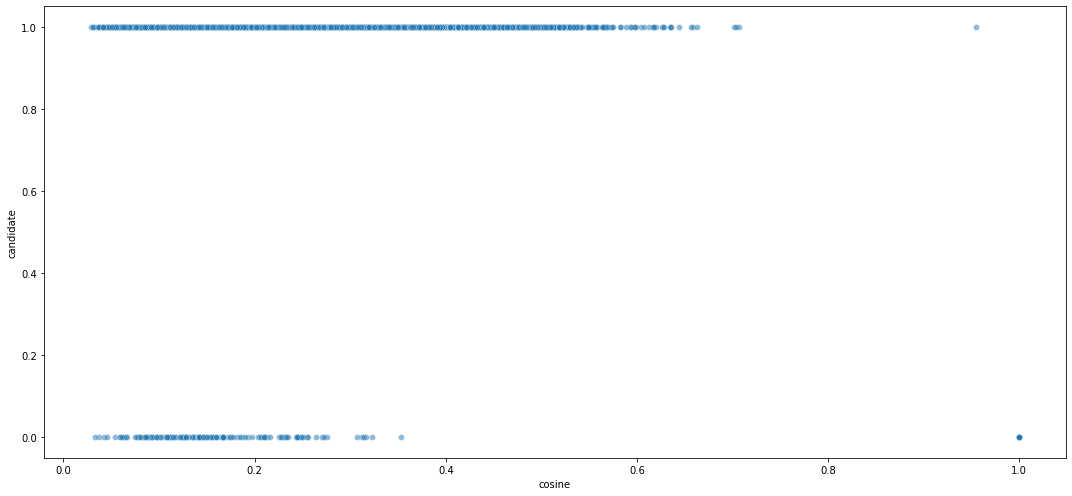

In [48]:
cos_min = pairs['cosine'].min()
cos_max = pairs['cosine'].max()
pairs['cosine_norm'] = (pairs['cosine'] - cos_min) / (cos_max - cos_min)

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.5)

In [49]:
def probability(s, r, b):
    # s: similarity
    # r: rows (per band)
    # b: number of bands
    return 1 - (1 - s**r)**b

def normalize(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

<AxesSubplot:xlabel='s', ylabel='P'>

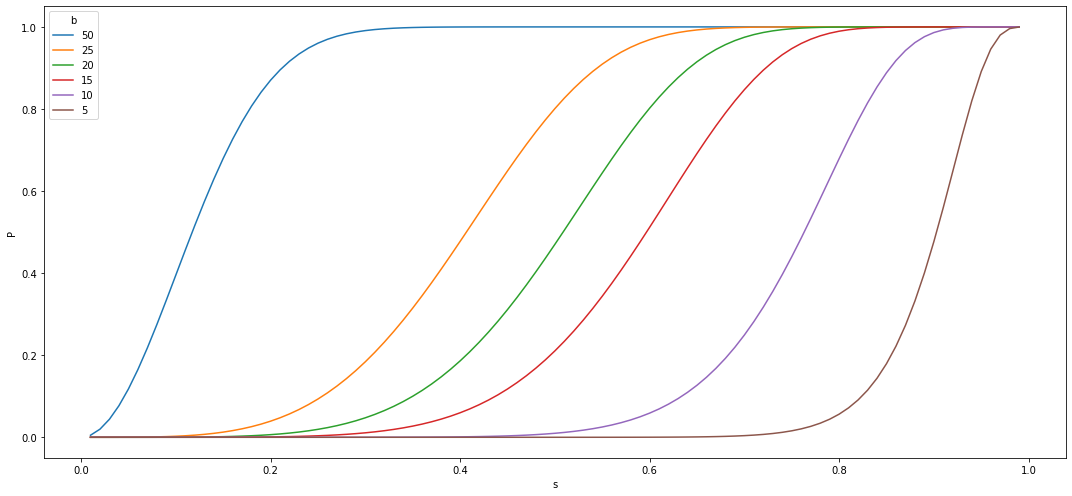

In [50]:
probs = pd.DataFrame({
    'P': [],
    's': [],
    'b': []
})

for b in [50, 25,20, 15,10,5]:
    r = int(100/b)
    s_scores = np.arange(0.01, 1, 0.01)
    P_scores = [probability(s, r, b) for s in s_scores]
    probs = probs.append(pd.DataFrame({
        'P': P_scores,
        's': s_scores,
        'b': [str(b)]*len(s_scores)
    }), ignore_index=True)

sns.lineplot(data=probs, x='s', y='P', hue='b')

In [51]:
for b in [50, 25,20, 15,10,5]:
    r = int(100/b)    
    print("Threshold for band ",b,"and row ",r,"is given as", (1/b)**(1/r))

Threshold for band  50 and row  2 is given as 0.1414213562373095
Threshold for band  25 and row  4 is given as 0.4472135954999579
Threshold for band  20 and row  5 is given as 0.5492802716530588
Threshold for band  15 and row  6 is given as 0.6367732194731706
Threshold for band  10 and row  10 is given as 0.7943282347242815
Threshold for band  5 and row  20 is given as 0.9226808345905884


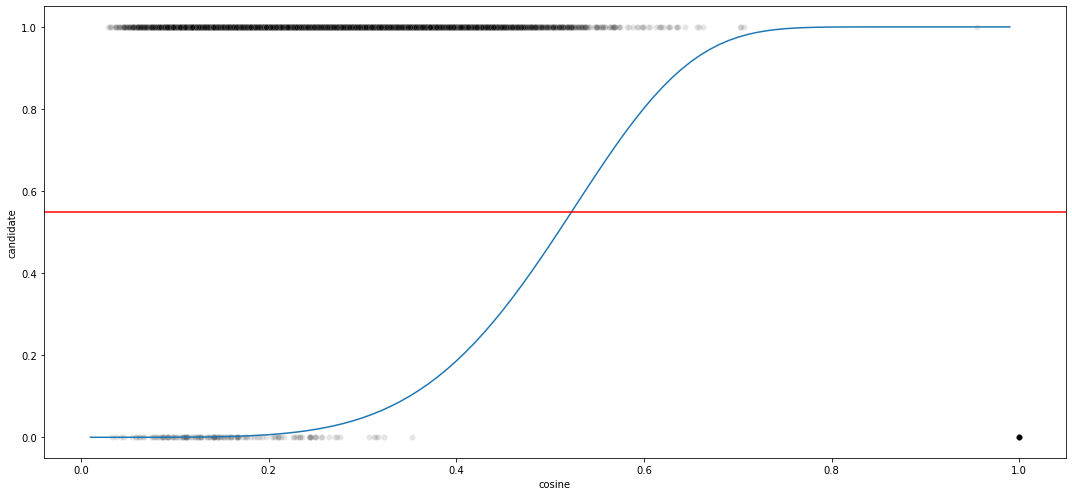

In [52]:
b = 20
r = 5
s_scores = np.arange(0.01, 1, 0.01)
P_scores = [probability(s, r, b) for s in s_scores]

graph = sns.lineplot(x=s_scores, y=P_scores)
graph = sns.scatterplot(data=pairs, x='cosine', y='candidate', alpha=0.1, color='k')
graph.axhline((1/b)**(1/r), color='red')
# graph.axvline((1/b)**(1/r), color='red',)

# Vader Model

In [53]:
#!pip install vaderSentiment
Lemmatize.head()

,Comments,Cleaned Reviews,POS tagged,Lemma
0,"""jio"" is the trend of today we all know that j...",jio is the trend of today we all know that ji...,"[('jio', 'n'), ('trend', 'n'), ('today', 'n'),...",jio trend today know jio offer free internet...
1,"""Reliance Jio"" a 4G network of Reliance which ...",reliance jio a g network of reliance which ha...,"[('reliance', 'n'), ('jio', 'n'), ('g', 'n'), ...",reliance jio g network reliance give awesome...
2,"""Reliance Jio"" is a 4G network service for Ind...",reliance jio is a g network service for india...,"[('reliance', 'n'), ('jio', 'n'), ('g', 'a'), ...",reliance jio g network service indian useful...
3,# Mukesh Ambani starts by talking about younge...,mukesh ambani starts by talking about younges...,"[('mukesh', 'a'), ('ambani', 'n'), ('starts', ...",mukesh ambani start talk young member relian...
4,## The Jio is a 4G service.##The Jio is a 4G ...,the jio is a g service the jio is a g service...,"[('jio', 'n'), ('g', 'a'), ('service', 'n'), (...",jio g service jio g service well sure know w...


In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']


def vader_analysis(compound):
    if compound >= 0.5:
        return 1
    elif compound <= -0.5 :
        return -1
    else:
        return 0
    

mydata['Vader Sentiment'] = Lemmatize['Lemma'].apply(vadersentimentanalysis)
mydata['VaderAnalysis'] = mydata['Vader Sentiment'].apply(vader_analysis)
mydata.head()

,user_id,location,State,Latitude,Longitude,reviews,comment title,Days ago(19 feb 2022),Year,views,Comments,stars,Vader Sentiment,VaderAnalysis
0,ashuraj760,India,NaN,22.351115,78.667743,4.0,"How much useful ""jio""",1919,2016,1785.0,"""jio"" is the trend of today we all know that j...",5.0,0.8393,1
1,gautam209,"Bangalore,India",Karnataka,12.976794,77.590082,3.0,"A great Start of ""Digital India""",1868,2017,1909.0,"""Reliance Jio"" a 4G network of Reliance which ...",4.0,0.9871,1
2,chadarmanoj135,"Tikamgarh,India",Madhya Pradesh,24.854503,79.046981,NaN,"""Reliance Jio"" jio jio life",1826,2017,1004.0,"""Reliance Jio"" is a 4G network service for Ind...",5.0,0.9686,1
3,praveshdiwakar9012,"Bareilly,India",NaN,28.457876,79.405571,5.0,HIGHLIGHTS FROM THE AGM BELOW,1962,2016,2690.0,# Mukesh Ambani starts by talking about younge...,5.0,0.5859,1
4,ranjankumar7,"Latur,India",NaN,18.351591,76.755424,NaN,The Jio is a 4G service.,1926,2016,1324.0,## The Jio is a 4G service.##The Jio is a 4G ...,5.0,0.6124,1


In [55]:
tb_counts = mydata["VaderAnalysis"].value_counts()
tb_counts

 1    9335
 0    1722
-1     785
Name: VaderAnalysis, dtype: int64

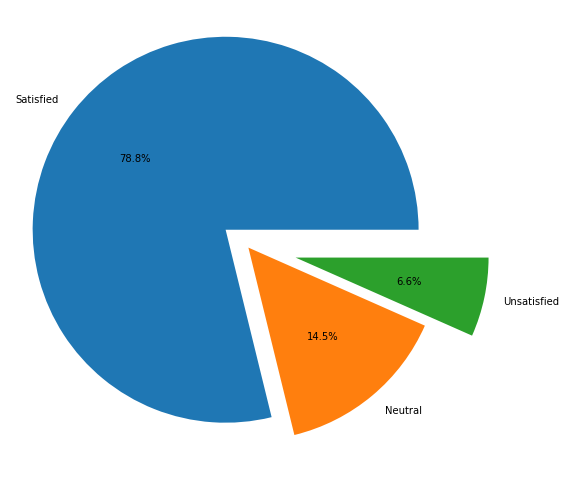

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= mydata["VaderAnalysis"].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = ["Satisfied","Neutral","Unsatisfied"], explode = (0.15, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

# Logistic Regression

In [57]:
y = mydata["stars"]
Y = []
column = list(y)
for i in column:
    if i < 3:
        Y.append(-1)
    elif i == 3:
        Y.append(0)
    else:
        Y.append(1)
    


In [58]:
y = Y
X = Lemmatize["Lemma"]

In [59]:
vect = CountVectorizer(ngram_range = (1,1), max_df = .95, min_df = 10)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.1)

In [60]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)

In [61]:
LR = LogisticRegression()
LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)

D:\D App data\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Performace Measure

### Accuracy Score

In [62]:
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')

Accuracy Score: 87.84810126582279%


### Confusion Matrix

In [63]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')

Confusion Matrix: 
[[ 45  33   6]
 [ 25 109  40]
 [  2  38 887]]


### Classification Report

In [64]:
print("Recall Score: ", metrics.classification_report(y_test, y_pred))

Recall Score:                precision    recall  f1-score   support

          -1       0.62      0.54      0.58        84
           0       0.61      0.63      0.62       174
           1       0.95      0.96      0.95       927

    accuracy                           0.88      1185
   macro avg       0.73      0.71      0.72      1185
weighted avg       0.88      0.88      0.88      1185



In [65]:
def predict(text):
    text = clean(text)
    text = pd.DataFrame([text])
    text = text[0].apply(token_stop_pos)
    text = text.apply(lemmatize)
    text_dtm = vect.transform(text)
    pred = LR.predict(text_dtm)
#     print(pred)
    if pred[0] == 1 :
        return "Customer is Satisfied"
    if pred[0] == 0:
        return "Customer Comment is Neutral"
    if pred[0] == -1 :
        return "Customer is Unsatisfied"

In [66]:
predict("Jio is fairly good" )

'Customer Comment is Neutral'

In [67]:
predict("Jio network speed is mediocre" )

'Customer Comment is Neutral'

In [68]:
predict("Jio is worst" )

'Customer is Unsatisfied'

# Year Wise Analysis

In [69]:
year_summary = pd.read_csv('Outlier_removed.csv', usecols=['Year','stars'])

In [70]:
dataYear = year_summary['Year']
dataStar = year_summary['stars']

In [71]:
yearly = {}
yearLabels = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
for i in range(len(year_summary)):
    if dataYear[i] in yearly:
        if dataStar[i] > 3:
            yearly[dataYear[i]][0] +=1
        elif dataStar[i] < 3 :
            yearly[dataYear[i]][1] +=1
        else:
            yearly[dataYear[i]][2] +=1
    else:
        yearly[dataYear[i]] = [0,0,0]
        if dataStar[i] > 3:
            yearly[dataYear[i]][0] +=1
        elif dataStar[i] < 3 :
            yearly[dataYear[i]][1] +=1
        else:
            yearly[dataYear[i]][2] +=1

In [72]:
yearly

{2017: [4484, 273, 626],
 2018: [1348, 114, 263],
 2019: [214, 94, 137],
 2016: [756, 29, 90],
 2020: [159, 100, 111],
 2021: [81, 44, 55],
 2022: [1, 3, 5]}

In [73]:
for i in yearly:
    sum = 0
    for j in yearly[i]:
        sum+=j
    yearly[i][0]/=sum
    yearly[i][1]/=sum    
    yearly[i][2]/=sum
yearly

{2017: [0.832992754969348, 0.05071521456436931, 0.11629203046628274],
 2018: [0.7814492753623189, 0.06608695652173913, 0.15246376811594203],
 2019: [0.48089887640449436, 0.21123595505617979, 0.30786516853932583],
 2016: [0.864, 0.03314285714285714, 0.10285714285714286],
 2020: [0.4297297297297297, 0.2702702702702703, 0.3],
 2021: [0.45, 0.24444444444444444, 0.3055555555555556],
 2022: [0.1111111111111111, 0.3333333333333333, 0.5555555555555556]}

In [74]:
labels = ['Satisfied', 'Unsatisfied', 'Neutral']
def showPie(i):
    print("Statistics Observed in the Year ", i)
    plt.pie(yearly[i], labels = labels, autopct='%1.2f%%' ,normalize = True)

Statistics Observed in the Year  2016


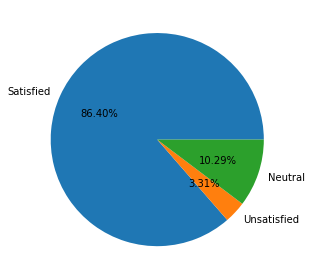

In [75]:
showPie(2016)

Statistics Observed in the Year  2017


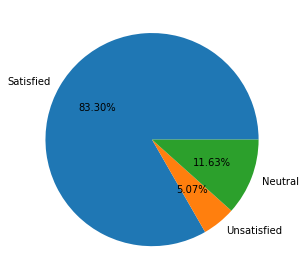

In [76]:
showPie(2017)

Statistics Observed in the Year  2018


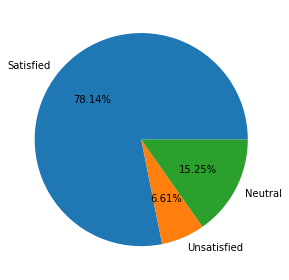

In [77]:
showPie(2018)

Statistics Observed in the Year  2019


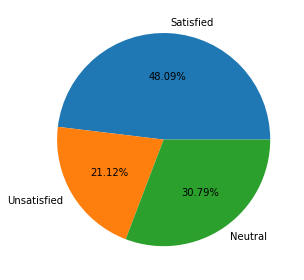

In [78]:
showPie(2019)

Statistics Observed in the Year  2020


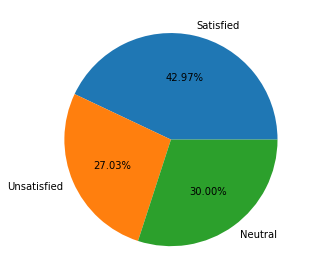

In [79]:
showPie(2020)

Statistics Observed in the Year  2021


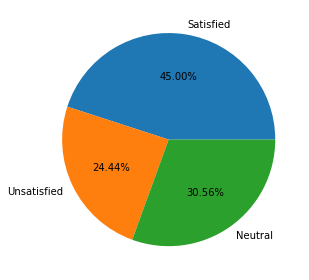

In [80]:
showPie(2021)

Statistics Observed in the Year  2022


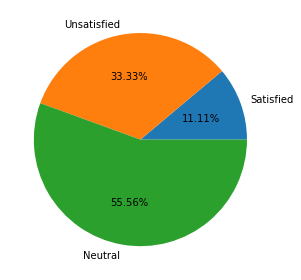

In [81]:
showPie(2022)

# Show Variation in the Sentiment throughout the Years

In [82]:
def showperYear(j):
    posperYear = []
#     j = 0
    for i in yearly:
        posperYear.append(yearly[i][j])
    return posperYear


def sentimentPerYear(j):
    plt.plot(yearLabels, showperYear(j))
    plt.xlabel("Variation Over the years")
    plt.ylabel("Sentiment towards the network")
    plt.show()
    
def showAllSentimentPerYear():
    plt.plot(yearLabels, showperYear(0), label='Satisfied')
    plt.plot(yearLabels, showperYear(1), label='Unsatisfied')
    plt.plot(yearLabels, showperYear(2), label='Neutral')
    plt.xlabel("Variation Over the years")
    plt.ylabel("Sentiment towards the network")
    plt.legend()
    plt.show()

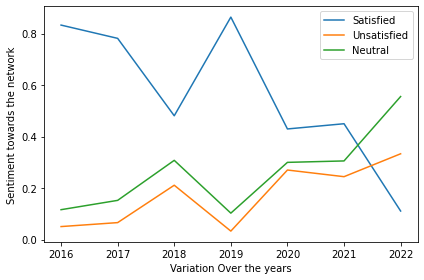

In [83]:
showAllSentimentPerYear()

# State Wise Analysis


In [84]:
myddata = pd.read_csv("Outlier_removed.csv")
# mydata.dropna(subset=["State"], inplace = True)

In [85]:
mydata['State']

0                   NaN
1             Karnataka
2        Madhya Pradesh
3                   NaN
4                   NaN
              ...      
11837               NaN
11838               NaN
11839    Madhya Pradesh
11840    Madhya Pradesh
11841             Delhi
Name: State, Length: 11842, dtype: object

In [86]:
myddata

,user_id,location,State,Latitude,Longitude,reviews,comment title,Days ago(19 feb 2022),Year,views,Comments,stars
0,gautam209,"Bangalore,India",Karnataka,12.976794,77.590082,3.0,"A great Start of ""Digital India""",1868,2017,1909.0,"""Reliance Jio"" a 4G network of Reliance which ...",4.0
1,chadarmanoj135,"Tikamgarh,India",Madhya Pradesh,24.854503,79.046981,NaN,"""Reliance Jio"" jio jio life",1826,2017,1004.0,"""Reliance Jio"" is a 4G network service for Ind...",5.0
2,Mahendra95,"Banswara,India",Rajasthan,23.493079,74.348402,150.0,Worst Experience Ever,1498,2018,1321.0,#Network#Customer Service# Charges and Billing...,3.0
3,Furqanaslam,"Jammu,And,Kashmir,India",Jammu and Kashmir,34.074475,74.835698,3.0,Jio means value for money,1346,2018,2103.0,( 1) Jio is the only network which has good ne...,4.0
4,khushalsingh326,"Kolkata,India",West Bengal,22.541418,88.357691,16.0,Awesome,1775,2017,1483.0,( I do not know why jio suddenly cancelled its...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8982,praveennpkkumar,"Hyderabad,India",Telangana,17.360589,78.474061,NaN,First let me thanks to jio...,1841,2017,1029.0,"You nailed it, jio welcome offer is upto 31st ...",3.0
8983,Addixt,"Navi,Mumbai,India",Maharashtra,19.030826,73.019854,NaN,Best thing that happened to India,1733,2017,1506.0,You read that right. Reliance Jio is in my opi...,4.0
8984,singhsourabh205,India,Madhya Pradesh,22.351115,78.667743,2.0,Complaint,855,2019,325.0,Your current plan only jio to jio calling & ji...,4.0
8985,swaggymusicindia,India,Madhya Pradesh,22.351115,78.667743,2.0,Poor coverage,171,2021,2086.0,Your house should be in 100-200m proximity of ...,2.0


In [87]:
import category_encoders as ce
import pandas as pd


encoder=ce.OneHotEncoder(cols='State',handle_unknown='return_nan',return_df=True,use_cat_names=True)


data2=myddata["State"]
data1 = mydata["VaderAnalysis"]
encoder=ce.HashingEncoder(cols='State',n_components=10)
data2.head()

0            Karnataka
1       Madhya Pradesh
2            Rajasthan
3    Jammu and Kashmir
4          West Bengal
Name: State, dtype: object

In [88]:
data1

0        1
1        1
2        1
3        1
4        1
        ..
11837    1
11838    1
11839    1
11840   -1
11841    0
Name: VaderAnalysis, Length: 11842, dtype: int64

In [89]:
temp = list(data2)
State_dictionary={}
i = 0 
for row in data2:
    if row in State_dictionary :
        if data1[i] == 1:
            State_dictionary[row][0] += 1
        elif data1[i] == -1 :
            State_dictionary[row][1] += 1
        else :
            State_dictionary[row][2] += 1
    else:
        State_dictionary[row] = [0,0,0]
        if data1[i] == 1:
            State_dictionary[row][0] += 1
        elif data1[i] == -1 :
            State_dictionary[row][1] += 1
        else :
            State_dictionary[row][2] += 1
    i += 1



In [90]:
State_dictionary

{'Karnataka': [371, 27, 75],
 'Madhya Pradesh': [1059, 104, 189],
 'Rajasthan': [277, 17, 54],
 'Jammu and Kashmir': [64, 3, 10],
 'West Bengal': [540, 43, 93],
 'Gujarat': [349, 40, 64],
 'Maharashtra': [844, 69, 151],
 'Punjab': [312, 23, 62],
 'Telangana': [331, 23, 70],
 'Uttar Pradesh': [676, 44, 128],
 'Tamil Nadu': [322, 22, 62],
 'Odisha': [153, 5, 28],
 'Jharkhand': [112, 9, 31],
 'Kerala': [170, 13, 35],
 'Haryana': [223, 17, 39],
 'Assam': [120, 12, 18],
 'Chhattisgarh': [68, 4, 15],
 'Delhi': [512, 41, 80],
 'Bihar': [202, 12, 31],
 'Uttarakhand': [82, 13, 16],
 'Andhra Pradesh': [141, 11, 30],
 'Arunachal Pradesh': [7, 0, 1],
 'Himachal Pradesh': [61, 7, 15],
 'Mizoram': [3, 0, 0],
 'Chandigarh': [44, 9, 10],
 'Tripura': [22, 1, 3],
 'Goa': [13, 0, 0],
 'Puducherry': [6, 0, 0],
 'Sikkim': [2, 0, 0],
 'Manipur': [9, 1, 1],
 'Nagaland': [3, 0, 0],
 'Meghalaya': [2, 0, 4],
 'Dadra and Nagar Haveli and Daman and Diu': [1, 0, 0],
 'Ladakh': [1, 0, 0]}

In [91]:
for key in State_dictionary:
    sum = 0
    temp = State_dictionary[key]
    for j in State_dictionary[key]:
        sum+=int(j)
    State_dictionary[key] = [ float(i/sum)*100 for i in temp]

In [92]:
import matplotlib.pyplot as plt
import numpy as np

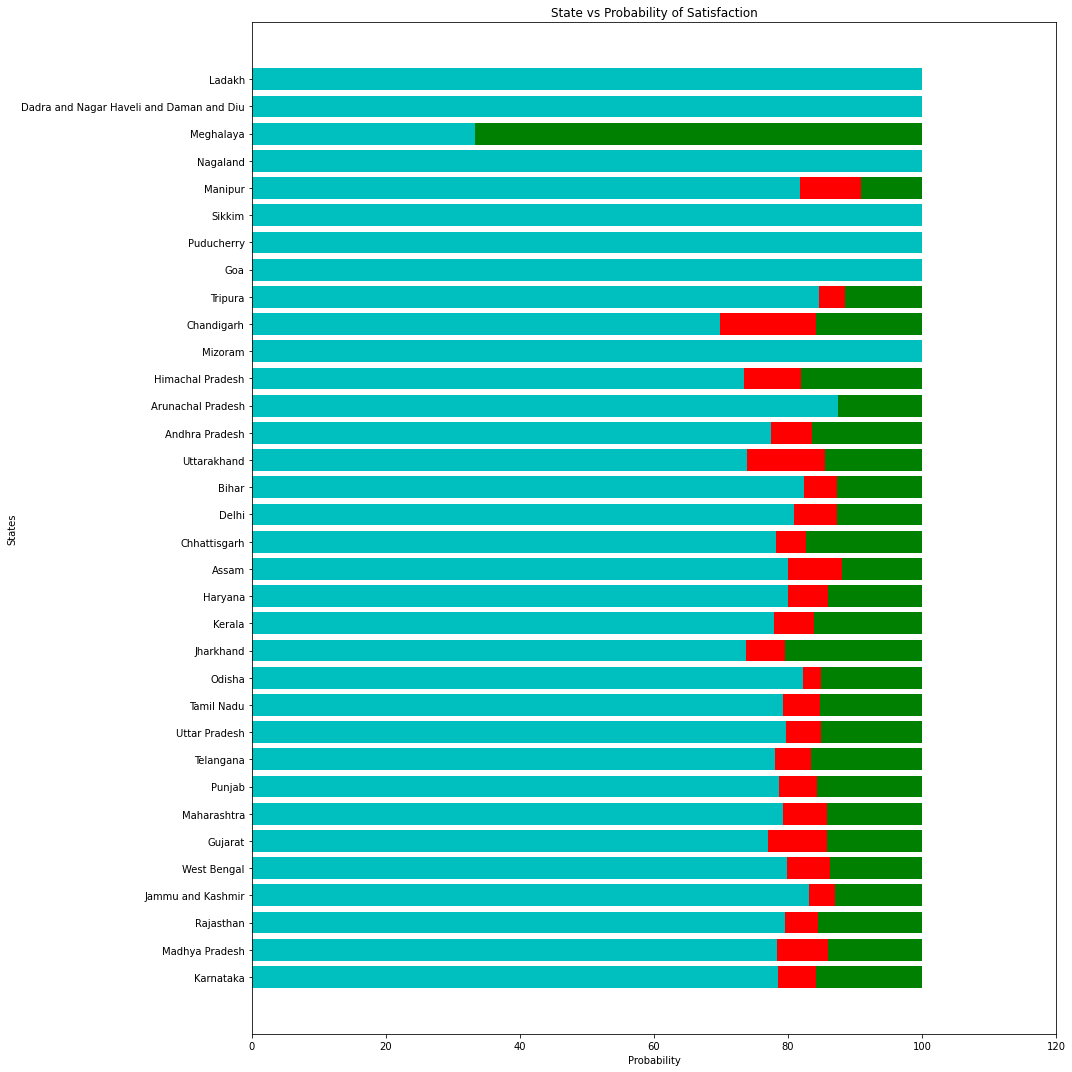

In [94]:
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
plt.xlim(0, 120)
for x in State_dictionary:
    y = State_dictionary[x]
    plt.barh(x, y[0], color='c' , label='Satisfied')
    plt.barh(x, y[1], left=y[0], color='r',label='Unsatisfied')
    plt.barh(x, y[2], left=y[0]+y[1], color='g',label='Neutral')
plt.title("State vs Probability of Satisfaction")
plt.xlabel("Probability")
plt.ylabel("States")

plt.show()